## 01 - Importes

In [1]:
!pip install -q aeon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 75.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

import torch
from torch import nn
import torch.optim as optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader


import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

from aeon.datasets import load_arrow_head, load_basic_motions


from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## 02 - Data

In [4]:
X_train = pd.read_csv('/content/ChlorineConcentration_TRAIN.tsv', delimiter='\t', header=None)

In [5]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,1,2.617332,3.230977,2.850800,2.751456,2.345657,2.274597,1.989764,1.848995,1.453290,...,-0.330768,1.306995,0.101411,-0.501958,-0.171426,-0.707244,-0.788341,-1.005866,-0.790221,-0.846320
1,3,1.982295,3.495607,3.108105,2.970201,2.546324,2.459205,2.173300,1.954165,1.354972,...,-0.365934,1.617816,0.116585,-0.212586,-0.101318,-0.468925,-0.574425,-0.845186,-0.584681,-0.645637
2,1,4.858639,4.575831,4.149750,3.989164,3.048770,2.893839,2.254284,2.212569,1.296898,...,0.070218,1.161238,0.877887,0.387564,0.624246,-0.004758,-0.353520,-0.730301,-0.463261,-0.514576
3,3,1.235991,3.716346,3.295182,3.118144,2.649632,2.539701,2.162827,1.809429,0.757237,...,-0.082932,1.848941,0.722741,-0.324813,0.246875,-0.574384,-0.687058,-0.923488,-0.678012,-0.762254
4,2,4.162084,4.077249,3.647736,3.553078,3.060077,2.838838,2.553006,2.188731,1.588650,...,-0.196576,0.981581,0.426008,0.182823,0.256298,-0.183502,-0.518826,-0.802884,-0.603505,-0.651567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,3,3.437413,3.346200,2.974121,2.872348,2.501290,2.447181,2.200222,2.080680,1.627538,...,-0.481358,1.331452,-0.022370,-0.143703,-0.168900,-0.427809,-0.589698,-0.932913,-0.609065,-0.688478
463,3,1.339752,3.663642,3.256854,3.088063,2.636563,2.533502,2.180888,1.870658,0.825670,...,-0.166464,1.815022,0.450011,-0.260602,0.090355,-0.515424,-0.620654,-0.888987,-0.620866,-0.692225
464,2,5.210585,4.839048,4.407591,4.223576,2.997907,2.899035,2.246037,2.136737,1.214908,...,0.107415,1.072439,0.839818,0.480024,0.634294,0.058844,-0.319699,-0.592186,-0.382192,-0.457937
465,1,1.037208,3.503990,3.147082,2.977082,2.530922,2.434315,2.092921,1.842572,1.173084,...,-0.237478,1.613013,0.655631,-0.464470,0.278532,-0.691501,-0.805869,-1.090522,-0.799889,-0.887110


In [6]:
# X_train = pd.read_csv('/content/Adiac_TRAIN.tsv', delimiter='\t', header=None)
y_train = X_train[0].to_numpy() - 1

X_train = X_train.drop(columns=[0])
X_train = X_train.to_numpy()


In [7]:
X_test = pd.read_csv('/content/ChlorineConcentration_TEST.tsv', delimiter='\t', header=None)
y_test = X_test[0].to_numpy() - 1

X_test = X_test.drop(columns=[0])
X_test = X_test.to_numpy()


In [8]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean)/(X_train_std)
X_test = (X_test - X_train_mean)/(X_train_std)

In [9]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
                                                test_size=0.5,
                                                stratify = y_test,
                                                random_state=42)

In [11]:
y_test.shape, y_val.shape

((1920,), (1920,))

In [12]:
num_classes = np.unique(y_train).shape[0]  # Número de classes

In [13]:
y_train.shape, y_val.shape, y_test.shape

((467,), (1920,), (1920,))

In [14]:
# Criando uma classe personalizada de Dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, data, labels):
        """
        Args:
            data: np.ndarray ou tensor com shape (n_cases, n_channels, n_timepoints)
            labels: np.ndarray ou tensor com os rótulos correspondentes
        """
        self.data = torch.tensor(data, dtype=torch.float32)  # Convertendo para tensor
        self.labels = torch.tensor(labels, dtype=torch.long)  # Labels como inteiros

        # num_classes = np.unique(labels).shape[0]  # Número de classes únicas
        # self.labels = F.one_hot(self.labels, num_classes=num_classes)

    def __len__(self):
        # Retorna o número total de amostras
        return len(self.data)

    def __getitem__(self, idx):
        # Retorna um único par (amostra, label) dado um índice
        return self.data[idx], self.labels[idx]




In [15]:
batch_size = 16

dataset_train = TimeSeriesDataset(X_train, y_train)
dataset_val = TimeSeriesDataset(X_val, y_val)
dataset_test = TimeSeriesDataset(X_test, y_test)

dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

# Criando o dataset

# Iterando sobre o DataLoader
# for batch_data, batch_labels in dataloader_train:
#     print("Batch data shape:", batch_data.shape)
#     print("Batch labels shape:", batch_labels.shape)

In [16]:
for teste in dataloader_train:
    print(teste[0].shape)
    break

torch.Size([16, 1, 166])


## 03 - Modelo

In [17]:
class fcn(nn.Module):
    def __init__(self, input_size, n_classes):
        super(fcn, self).__init__()

        # Camadas convolucionais
        self.conv1 = nn.Conv1d(in_channels=1,
                               out_channels=128,
                               kernel_size=8,
                               stride=1,
                               padding='same')

        self.bn1 = nn.BatchNorm1d(128)

        self.conv2 = nn.Conv1d(in_channels=128,
                               out_channels=256,
                               kernel_size=5,
                               stride=1,
                               padding='same')

        self.bn2 = nn.BatchNorm1d(256)

        self.conv3 = nn.Conv1d(in_channels=256,
                               out_channels=128,
                               kernel_size=3,
                               stride=1,
                               padding='same')

        self.bn3 = nn.BatchNorm1d(128)

        # Pooling global
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)

        # Camada de saída
        self.fc = nn.Linear(128, n_classes)

    def forward(self, x):
        # Primeira convolução
        x = self.conv1(x)
        x = self.bn1(x)
        x = torch.relu(x)

        # Segunda convolução
        x = self.conv2(x)
        x = self.bn2(x)
        x = torch.relu(x)

        # Terceira convolução
        x = self.conv3(x)
        x = self.bn3(x)
        x = torch.relu(x)

        # Global Average Pooling
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)  # Flatten

        # Camada densa
        x = self.fc(x)

        return x


    def initialize_weights(self):
        for layer in self.children():
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_normal_(layer.weight)
                nn.init.zeros_(layer.bias)
            elif isinstance(layer, nn.Conv1d):
                nn.init.kaiming_normal_(layer.weight)
                if layer.bias is not None:
                    nn.init.zeros_(layer.bias)


In [18]:
input_size =X_train.shape[2] # tamanho de uma série
n_classes = len(np.unique(y_train))

print(f'Input size: {input_size}, n_classes: {n_classes}')

Input size: 166, n_classes: 3


In [19]:
# Configurações gerais
input_dim = input_size  # Dimensão de entrada
output_dim = n_classes
num_epochs = 100
learning_rate = 0.01
seeds = [i for i in range(100)]  # Lista de sementes a serem testadas

In [20]:
# seeds

In [21]:
def train_one_epoch(model, dataloader, optimizer, loss_fn, device):
    model.train()  # Modo de treino
    running_loss = 0.0
    correct_predictions = 0


    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Ajuste condicional para dimensões (se necessário)
        if outputs.dim() > 2 and outputs.size(1) == 1:
            outputs = outputs.squeeze(1)

        loss = loss_fn(outputs, labels)

        # Calcular acurácia
        preds = torch.argmax(outputs, dim=1)
        correct_predictions += (preds == labels).sum().item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(dataloader)
    accuracy = correct_predictions / len(dataloader.dataset)

    return avg_loss, accuracy

In [22]:
# Função de avaliação
def evaluate(model, dataloader, loss_fn, device):
    model.eval()  # Modo de avaliação
    running_loss = 0.0
    correct_predictions = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)

            # Ajuste condicional para dimensões
            if outputs.dim() > 2 and outputs.size(1) == 1:
                outputs = outputs.squeeze(1)

            loss = loss_fn(outputs, labels)
            running_loss += loss.item()

            # Calcular acurácia
            preds = torch.argmax(outputs, dim=1)
            correct_predictions += (preds == labels).sum().item()

    avg_loss = running_loss / len(dataloader)
    accuracy = correct_predictions / len(dataloader.dataset)
    return avg_loss, accuracy

In [23]:
    # optimizer = optim.Adam(
    #     model.parameters(),
    #     lr=0.001,
    #     betas=(0.9, 0.999),
    #     eps=1e-8
    # )

In [24]:
# model = fcn(input_size=input_size, n_classes = n_classes)
# model = model.to(device)

# for m in model.modules():
#     print(type(m))

In [25]:
def train_model(seed):
    torch.manual_seed(seed)

    model = fcn(input_size=input_size, n_classes = n_classes)
    model = model.to(device)

    loss_fn = nn.CrossEntropyLoss()

    optimizer = optim.Adam(
        model.parameters(),
        lr=0.001,
        betas=(0.9, 0.999),
        eps=1e-8
    )

    train_losses, val_losses, val_accuracies = [], [], []

    print(f'Teste da Seed: {seed}')
    best_model = model
    best_val_acc = 0

    train_metrics_list = []
    val_metrics_list = []
    for epoch in range(num_epochs):
        # Treinamento
        train_loss, train_acc = train_one_epoch(model, dataloader_train, optimizer, loss_fn, device)

        train_metrics_list.append((train_loss, train_acc))



        train_losses.append(train_loss)

        # Avaliação
        val_loss, val_acc = evaluate(model, dataloader_val, loss_fn, device)
        val_metrics_list.append((val_loss, val_acc))



        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model

        if (epoch + 1) == 50:
            print(f"Epoch {epoch+1}/{num_epochs}")
            print(f"  Train Loss: {train_loss:.4f}")
            print(f"  Validation Loss: {val_loss:.4f}")
            print(f"  Validation Accuracy: {val_acc:.4f}")

    test_loss, test_acc = evaluate(best_model, dataloader_test, loss_fn, device)

    return train_metrics_list, val_metrics_list, test_acc

In [26]:
# import numpy as np
# (1/2)*(np.array([1,23]) + np.array([3,23]))

In [27]:
# Testando diferentes sementes
results = {}
acc_list_total =np.zeros(100)
val_list_total = np.zeros(100)

for seed in seeds:
    train_metrics_list, val_metrics_list, test_acc = train_model(seed)
    train_acc_1, val_acc_1 = train_metrics_list[0][1], val_metrics_list[0][1]

    acc_list = np.array([train_metrics_list[i][1] for i in range(len(train_metrics_list))])
    acc_list_total = (1/2)*(acc_list_total + acc_list)

    val_list = np.array([val_metrics_list[i][1] for i in range(len(val_metrics_list))])
    val_list_total = (1/2)*(val_list_total + val_list)

    results[seed] = train_acc_1, val_acc_1, test_acc
    print(f"Semente: {seed}, train_acc_1: {train_acc_1:.4f}, val_acc_1: {val_acc_1:.4f}, test_acc {test_acc:.4f}")

Teste da Seed: 0


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:370: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:1036.)
  return F.conv1d(


Epoch 50/100
  Train Loss: 0.7997
  Validation Loss: 1.2013
  Validation Accuracy: 0.5536
Semente: 0, train_acc_1: 0.5632, val_acc_1: 0.5391, test_acc 0.5604
Teste da Seed: 1
Epoch 50/100
  Train Loss: 0.8319
  Validation Loss: 1.1570
  Validation Accuracy: 0.5687
Semente: 1, train_acc_1: 0.5482, val_acc_1: 0.5448, test_acc 0.3870
Teste da Seed: 2
Epoch 50/100
  Train Loss: 0.8062
  Validation Loss: 0.9695
  Validation Accuracy: 0.4995
Semente: 2, train_acc_1: 0.5396, val_acc_1: 0.5328, test_acc 0.5661
Teste da Seed: 3
Epoch 50/100
  Train Loss: 0.8033
  Validation Loss: 0.9452
  Validation Accuracy: 0.5583
Semente: 3, train_acc_1: 0.5482, val_acc_1: 0.5375, test_acc 0.4813
Teste da Seed: 4
Epoch 50/100
  Train Loss: 0.8157
  Validation Loss: 0.9005
  Validation Accuracy: 0.5974
Semente: 4, train_acc_1: 0.5375, val_acc_1: 0.5448, test_acc 0.2307
Teste da Seed: 5
Epoch 50/100
  Train Loss: 0.8362
  Validation Loss: 1.4054
  Validation Accuracy: 0.4969
Semente: 5, train_acc_1: 0.5375, va

In [28]:
# results.items()

In [29]:
# results

In [30]:
# Resultados finais
print("\nResultados por semente:")
train_acc_1_list = []
val_acc_1_list = []
test_acc_list = []
for seed, accs in results.items():
    print(f"Semente: {seed}, train_acc_1: {accs[0]:.4}, val_acc_1: {accs[1]:.4}, test_acc {accs[2]:.4}")
    train_acc_1_list.append(accs[0])
    val_acc_1_list.append(accs[1])
    test_acc_list.append(accs[2])


Resultados por semente:
Semente: 0, train_acc_1: 0.5632, val_acc_1: 0.5391, test_acc 0.5604
Semente: 1, train_acc_1: 0.5482, val_acc_1: 0.5448, test_acc 0.387
Semente: 2, train_acc_1: 0.5396, val_acc_1: 0.5328, test_acc 0.5661
Semente: 3, train_acc_1: 0.5482, val_acc_1: 0.5375, test_acc 0.4813
Semente: 4, train_acc_1: 0.5375, val_acc_1: 0.5448, test_acc 0.2307
Semente: 5, train_acc_1: 0.5375, val_acc_1: 0.5453, test_acc 0.638
Semente: 6, train_acc_1: 0.5503, val_acc_1: 0.5516, test_acc 0.5927
Semente: 7, train_acc_1: 0.561, val_acc_1: 0.5443, test_acc 0.6177
Semente: 8, train_acc_1: 0.5525, val_acc_1: 0.5453, test_acc 0.6068
Semente: 9, train_acc_1: 0.5439, val_acc_1: 0.5474, test_acc 0.4109
Semente: 10, train_acc_1: 0.5396, val_acc_1: 0.5464, test_acc 0.6354
Semente: 11, train_acc_1: 0.5589, val_acc_1: 0.5474, test_acc 0.562
Semente: 12, train_acc_1: 0.5054, val_acc_1: 0.5328, test_acc 0.5682
Semente: 13, train_acc_1: 0.5482, val_acc_1: 0.5328, test_acc 0.2542
Semente: 14, train_acc_

In [31]:
train_acc_1_mean, val_acc_1_mean, test_acc_mean = np.mean(train_acc_1_list), np.mean(val_acc_1_list), np.mean(test_acc_list)
train_acc_1_std, val_acc_1_std, test_acc_std = np.std(train_acc_1_list), np.std(val_acc_1_list), np.std(test_acc_list)

In [32]:
print(f"Média de train_acc_1: {train_acc_1_mean:.4f}, Desvio padrão: {train_acc_1_std:.4f}")
print(f"Média de val_acc_1: {val_acc_1_mean:.4f}, Desvio padrão: {val_acc_1_std:.4f}")
print(f"Média de test_acc: {test_acc_mean:.4f}, Desvio padrão: {test_acc_std:.4f}")

Média de train_acc_1: 0.5411, Desvio padrão: 0.0159
Média de val_acc_1: 0.5408, Desvio padrão: 0.0198
Média de test_acc: 0.4608, Desvio padrão: 0.1423


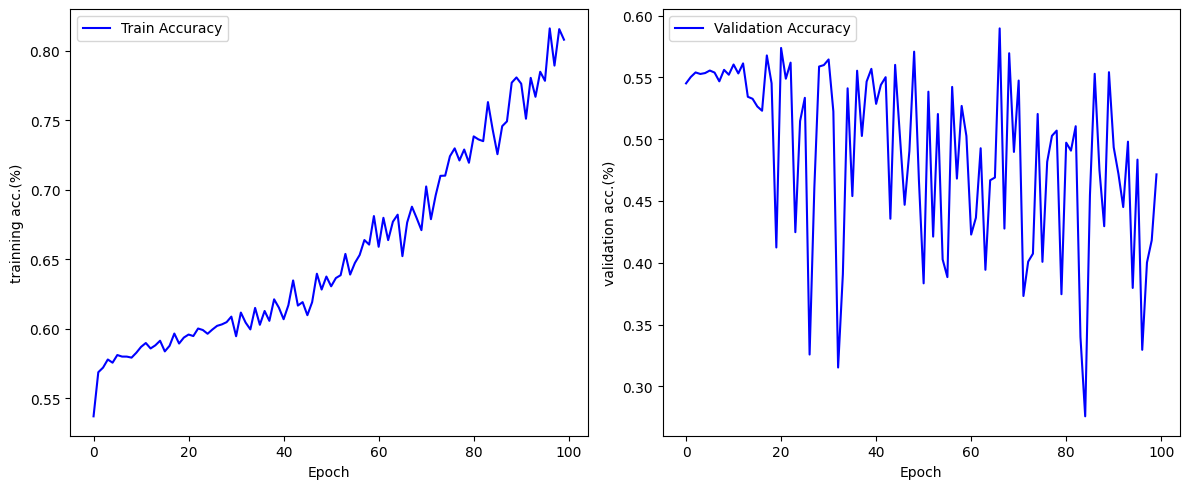

In [33]:
plt.figure(figsize=(12, 5))

# Primeiro gráfico: Acurácia de treino
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
plt.plot(acc_list_total, label='Train Accuracy', color='blue')
plt.xlabel("Epoch")
plt.ylabel("trainning acc.(%)")
plt.legend()

# Segundo gráfico: Acurácia de validação
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
plt.plot(val_list_total, label='Validation Accuracy', color='blue')
plt.xlabel("Epoch")
plt.ylabel("validation acc.(%)")
plt.legend()

# Mostrar os gráficos
plt.tight_layout()  # Ajusta o layout automaticamente
plt.show()


In [34]:
# # 1 = sentimento positivo ou 0 = sentimento negativo

# model = mlp(input_size=input_size, n_classes = n_classes)
# model = model.to(device)

# loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.Adadelta(model.parameters(), lr=0.1, rho=0.95, eps=1e-8)

## PA rewiring method

- @author: scabini

In [35]:
def rewiring_np(weights, seed):
    dimensions = weights.shape
    if seed:
        rng = np.random.default_rng(seed)
    else:
        rng = np.random.default_rng()
    st = np.zeros(dimensions[1])
    for neuron in range(1,dimensions[0]): #loops over output neurons from 2 to n-1
        st = st + weights[neuron-1]   #compute the temporary strength
        P = st + np.abs(np.min(st)) + 1 #make the distribution positive and avoid null probability
        P = P / np.sum(P) #pdf from negative to positive
        targets = rng.choice(a=[i for i in range(dimensions[1])], replace=False,
                                      size=dimensions[1],p=P)
        edges_to_rewire = np.argsort(weights[neuron]) #sort the edges to be rewired
        weights[neuron, targets] = weights[neuron, edges_to_rewire] #rewiring
    return weights

In [36]:
def rewiring_torch(weights, seed):
    if seed:
        rng = np.random.default_rng(seed)
    else:
        rng = np.random.default_rng()
    st = torch.zeros(weights.size(1))
    with torch.no_grad():
        dimensions = weights.shape
        for neuron in range(1,dimensions[0]):
            st = st + weights[neuron-1]
            P = st + torch.abs(torch.min(st)) + 1 #the +1 is to ensure no zero values
            P = P / torch.sum(P)
            targets = rng.choice(a=[i for i in range(dimensions[1])], replace=False,
                                          size=dimensions[1],p=P.cpu().detach().numpy())
            edges_to_rewire = torch.argsort(weights[neuron])
            weights[neuron, targets] = weights[neuron, edges_to_rewire]
    return weights

In [37]:
### Numpy version: has better numerical precision than the torch version;
#   however, it creates a copy of the weight tensor
def PA_rewiring_np(weights, seed=False):
    if weights.ndimension() < 2:
        raise ValueError("Only tensors with 2 or more dimensions are supported")
    output_neurons = weights.size(0)
    input_neurons = weights.numel() // output_neurons
    dimensions = weights.shape
    weights_out = weights.cpu().detach().numpy()
    weights_out = weights_out.reshape((output_neurons, input_neurons))
    rewiring_np(weights_out, seed) #rewire input neurons
    rewiring_np(np.transpose(weights_out), seed) #rewire output neurons
    weights_out = weights_out.reshape((dimensions))
    weights_out=torch.from_numpy(weights_out)
    with torch.no_grad():
        weights.view_as(weights_out).copy_(weights_out)
    return weights  #cast the obtained tensor into the input tensor 'weights'

In [38]:
### Pytorch implementation: looses precision on large sums compared to
#   numpy, i.e., the strength calculations will be different.
#   I recommend using the np version (but check efficiency)
def PA_rewiring_torch(weights, seed=False):
    if weights.ndimension() < 2:
        raise ValueError("Only tensors with 2 or more dimensions are supported")
    with torch.no_grad():
        output_neurons = weights.size(0)
        input_neurons = weights.numel() // output_neurons
        dimensions = weights.shape
        weights = weights.reshape((output_neurons, input_neurons))
        rewiring_torch(weights, seed)
        rewiring_torch(torch.transpose(weights, 0, 1), seed)
        weights = weights.reshape((dimensions))
    return weights  #cast the obtained tensor into the input tensor 'weights'

In [39]:
def stabilize_strength(initializer, weights, K=100): #how much stable? =) increase K!
### random search to minimize strength variance
#initializer is a lambda function that receives the weights, eg:
# initializer = lambda w : torch.nn.init.kaiming_normal_(w, mode='fan_in', nonlinearity='relu')
#or simply:
# initializer = torch.nn.init.orthogonal_
#weights is a torch weight matrix taken from a layer
    maximus = np.Infinity
    dimensions = weights.shape
    output_neurons = weights.size(0)
    input_neurons = weights.numel() // output_neurons
    weights_out = torch.empty(dimensions)
    for i in range(K):
        initializer(weights)
        weights = weights.reshape((output_neurons, input_neurons))
        localmax = torch.mean(torch.hstack((torch.var(torch.sum(weights, dim=0) ), torch.var(torch.sum(weights, dim=1) ))))
        if localmax < maximus:
            maximus = localmax
            with torch.no_grad():
                weights_out.view_as(weights).copy_(weights)

    with torch.no_grad():
        weights.view_as(weights_out.reshape(dimensions)).copy_(weights_out.reshape(dimensions))

    return weights


- Refazer a estrutura, mas agora aplicando a técnica do PARw

In [40]:
2+2

4

In [41]:
def train_model_parw(seed):
    torch.manual_seed(seed)

    model = fcn(input_size=input_size, n_classes = n_classes)
    model = model.to(device)

    #########################
    for m in model.modules():
        if isinstance(m, torch.nn.Conv1d) or isinstance(m, torch.nn.Linear):
            PA_rewiring_np(m.weight)
    #########################

    loss_fn = nn.CrossEntropyLoss()

    optimizer = optim.Adam(
        model.parameters(),
        lr=0.001,
        betas=(0.9, 0.999),
        eps=1e-8
    )
    train_losses, val_losses, val_accuracies = [], [], []

    print(f'Teste da Seed: {seed}')
    best_model = model
    best_val_acc = 0
    train_metrics_list = []
    val_metrics_list = []
    for epoch in range(num_epochs):
        # Treinamento
        train_loss, train_acc = train_one_epoch(model, dataloader_train, optimizer, loss_fn, device)

        train_metrics_list.append((train_loss, train_acc))



        train_losses.append(train_loss)

        # Avaliação
        val_loss, val_acc = evaluate(model, dataloader_val, loss_fn, device)
        val_metrics_list.append((val_loss, val_acc))



        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = model

        if (epoch + 1) == 50:
            print(f"Epoch {epoch+1}/{num_epochs}")
            print(f"  Train Loss: {train_loss:.4f}")
            print(f"  Validation Loss: {val_loss:.4f}")
            print(f"  Validation Accuracy: {val_acc:.4f}")

    test_loss, test_acc = evaluate(best_model, dataloader_test, loss_fn, device)

    return train_metrics_list, val_metrics_list, test_acc

In [42]:
# Testando diferentes sementes
results = {}
acc_list_total_parw = np.zeros(100)
val_list_total_parw = np.zeros(100)

for seed in seeds:
    train_metrics_list, val_metrics_list, test_acc = train_model_parw(seed)
    train_acc_1, val_acc_1 = train_metrics_list[0][1], val_metrics_list[0][1]

    acc_list = np.array([train_metrics_list[i][1] for i in range(len(train_metrics_list))])
    acc_list_total_parw = (1/2)*(acc_list_total_parw + acc_list)

    val_list = np.array([val_metrics_list[i][1] for i in range(len(val_metrics_list))])
    val_list_total_parw = (1/2)*(val_list_total_parw + val_list)

    results[seed] = train_acc_1, val_acc_1, test_acc
    print(f"Semente: {seed}, train_acc_1: {train_acc_1:.4f}, val_acc_1: {val_acc_1:.4f}, test_acc {test_acc:.4f}")

Teste da Seed: 0
Epoch 50/100
  Train Loss: 0.7888
  Validation Loss: 1.2253
  Validation Accuracy: 0.4260
Semente: 0, train_acc_1: 0.5439, val_acc_1: 0.5328, test_acc 0.5547
Teste da Seed: 1
Epoch 50/100
  Train Loss: 0.8074
  Validation Loss: 1.1813
  Validation Accuracy: 0.5771
Semente: 1, train_acc_1: 0.5439, val_acc_1: 0.5479, test_acc 0.3599
Teste da Seed: 2
Epoch 50/100
  Train Loss: 0.7904
  Validation Loss: 1.0591
  Validation Accuracy: 0.4167
Semente: 2, train_acc_1: 0.5054, val_acc_1: 0.5401, test_acc 0.5594
Teste da Seed: 3
Epoch 50/100
  Train Loss: 0.7251
  Validation Loss: 1.4595
  Validation Accuracy: 0.3010
Semente: 3, train_acc_1: 0.5460, val_acc_1: 0.5422, test_acc 0.6505
Teste da Seed: 4
Epoch 50/100
  Train Loss: 0.8100
  Validation Loss: 1.0295
  Validation Accuracy: 0.4656
Semente: 4, train_acc_1: 0.5396, val_acc_1: 0.5479, test_acc 0.3859
Teste da Seed: 5
Epoch 50/100
  Train Loss: 0.7859
  Validation Loss: 1.5567
  Validation Accuracy: 0.5536
Semente: 5, train_

In [43]:
# Resultados finais
print("\nResultados por semente:")
train_acc_1_list = []
val_acc_1_list = []
test_acc_list = []
for seed, accs in results.items():
    print(f"Semente: {seed}, train_acc_1: {accs[0]:.4}, val_acc_1: {accs[1]:.4}, test_acc {accs[2]:.4}")
    train_acc_1_list.append(accs[0])
    val_acc_1_list.append(accs[1])
    test_acc_list.append(accs[2])


Resultados por semente:
Semente: 0, train_acc_1: 0.5439, val_acc_1: 0.5328, test_acc 0.5547
Semente: 1, train_acc_1: 0.5439, val_acc_1: 0.5479, test_acc 0.3599
Semente: 2, train_acc_1: 0.5054, val_acc_1: 0.5401, test_acc 0.5594
Semente: 3, train_acc_1: 0.546, val_acc_1: 0.5422, test_acc 0.6505
Semente: 4, train_acc_1: 0.5396, val_acc_1: 0.5479, test_acc 0.3859
Semente: 5, train_acc_1: 0.5546, val_acc_1: 0.5505, test_acc 0.551
Semente: 6, train_acc_1: 0.531, val_acc_1: 0.5505, test_acc 0.6396
Semente: 7, train_acc_1: 0.531, val_acc_1: 0.5505, test_acc 0.574
Semente: 8, train_acc_1: 0.5675, val_acc_1: 0.4464, test_acc 0.5094
Semente: 9, train_acc_1: 0.5396, val_acc_1: 0.5479, test_acc 0.2656
Semente: 10, train_acc_1: 0.5482, val_acc_1: 0.5432, test_acc 0.5792
Semente: 11, train_acc_1: 0.5525, val_acc_1: 0.5474, test_acc 0.5625
Semente: 12, train_acc_1: 0.5418, val_acc_1: 0.5328, test_acc 0.5484
Semente: 13, train_acc_1: 0.5439, val_acc_1: 0.5328, test_acc 0.6328
Semente: 14, train_acc_1

In [44]:
train_acc_1_pwd_mean, val_acc_1_pwd_mean, test_acc_pwd_mean = np.mean(train_acc_1_list), np.mean(val_acc_1_list), np.mean(test_acc_list)
train_acc_1_pwd_std, val_acc_1_pwd_std, test_acc_pwd_std = np.std(train_acc_1_list), np.std(val_acc_1_list), np.std(test_acc_list)

In [45]:
print(f"Média de train_acc_1: {train_acc_1_pwd_mean:.4f}, Desvio padrão: {train_acc_1_pwd_std:.4f}")
print(f"Média de val_acc_1: {val_acc_1_pwd_mean:.4f}, Desvio padrão: {val_acc_1_pwd_std:.4f}")
print(f"Média de test_acc: {test_acc_pwd_mean:.4f}, Desvio padrão: {test_acc_pwd_std:.4f}")

Média de train_acc_1: 0.5430, Desvio padrão: 0.0123
Média de val_acc_1: 0.5414, Desvio padrão: 0.0203
Média de test_acc: 0.4947, Desvio padrão: 0.1360


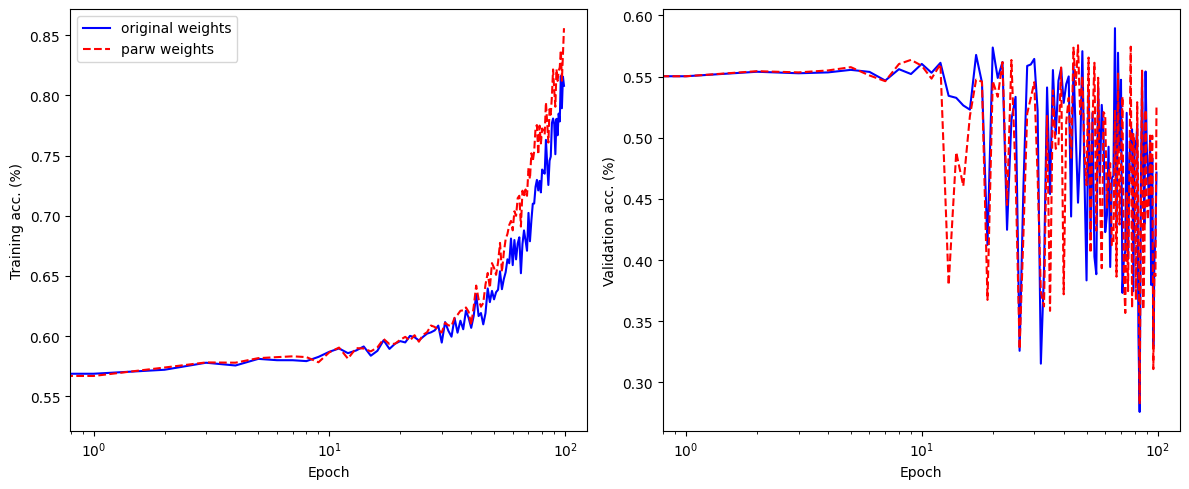

In [46]:
plt.figure(figsize=(12, 5))

# Primeiro gráfico: Acurácia de treino
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
plt.plot(acc_list_total, label='original weights', color='blue')
plt.plot(acc_list_total_parw, label='parw weights', color='red', linestyle='dashed')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xlabel("Epoch")
plt.ylabel("Training acc. (%)")
plt.legend()

# Segundo gráfico: Acurácia de validação
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
plt.plot(val_list_total, label='Validation Accuracy', color='blue')
plt.plot(val_list_total_parw, label='parw weights', color='red', linestyle='dashed')
plt.xscale('log')  # Escala logarítmica no eixo x
plt.xlabel("Epoch")
plt.ylabel("Validation acc. (%)")

# Mostrar os gráficos
plt.tight_layout()  # Ajusta o layout automaticamente

plt.savefig('fcn_Chlorine.png', dpi=300)
plt.show()

In [47]:
print(f"Média de train_acc_normal_1: {train_acc_1_mean:.4f}, Desvio padrão: {train_acc_1_std:.4f}")
print(f"Média de val_acc_normal_1: {val_acc_1_mean:.4f}, Desvio padrão: {val_acc_1_std:.4f}")
print(f"Média de test_acc_normal: {test_acc_mean:.4f}, Desvio padrão: {test_acc_std:.4f}")
print("\n################\n")
print(f"Média de train_acc_1: {train_acc_1_pwd_mean:.4f}, Desvio padrão: {train_acc_1_pwd_std:.4f}")
print(f"Média de val_acc_1: {val_acc_1_pwd_mean:.4f}, Desvio padrão: {val_acc_1_pwd_std:.4f}")
print(f"Média de test_acc: {test_acc_pwd_mean:.4f}, Desvio padrão: {test_acc_pwd_std:.4f}")

Média de train_acc_normal_1: 0.5411, Desvio padrão: 0.0159
Média de val_acc_normal_1: 0.5408, Desvio padrão: 0.0198
Média de test_acc_normal: 0.4608, Desvio padrão: 0.1423

################

Média de train_acc_1: 0.5430, Desvio padrão: 0.0123
Média de val_acc_1: 0.5414, Desvio padrão: 0.0203
Média de test_acc: 0.4947, Desvio padrão: 0.1360
